# Import des librairies pour le fonctionnement du programme

In [1]:
import os

import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt


# Création des fonctions pour charger toutes les données ou juste un fichier

In [2]:
def load_all_data():
    data = []
    directory = "Test2"
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        with open(f, "r") as file:
            lines = file.readlines()
            for line in lines:
                data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')

def load_data(filename):
    data = []
    directory = "Test2"
    f = os.path.join(directory, filename)
    with open(f, "r") as file:
        lines = file.readlines()
        for line in lines:
            data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')

## Récupération d'un relevé au de l'expérience début et d'un autre à la fin

In [3]:
first = load_data("2004.02.13.03.02.39")
second = load_data("2004.02.17.15.22.39")

## On affiche les données sous forme de graphe

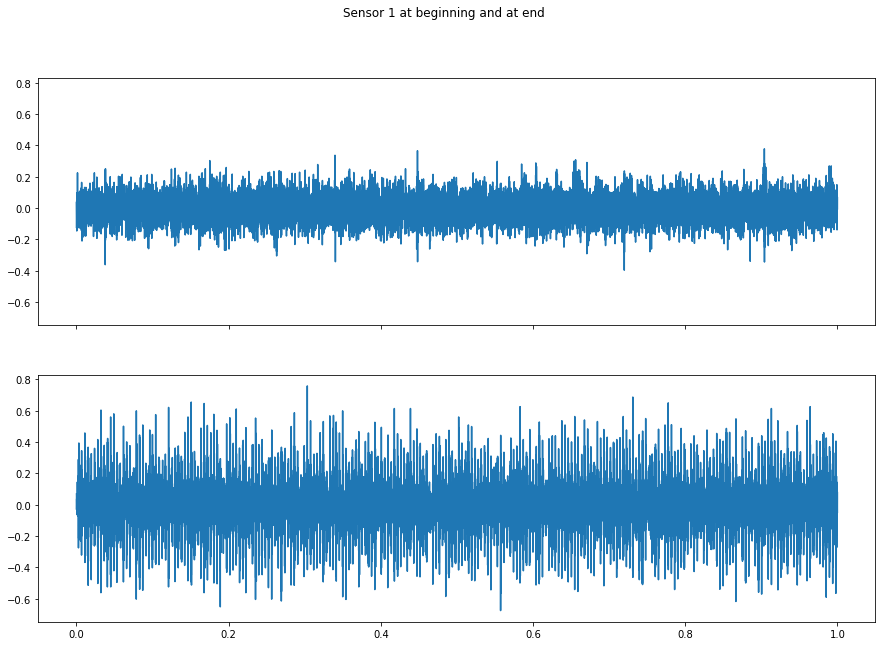

In [4]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('Sensor 1 at beginning and at end')
axs[0].plot(np.linspace(0, 1, len(first)), first[:, 0])
axs[1].plot(np.linspace(0, 1, len(first)), second[:, 0])


On peut observer une augmentation des vibration du capteur 1 à la fin de l'expérience. En effet, lors du premier relevé, la moyenne est entre [-0.2, 0.2] et lors de la fin, la moyenne est entre [-0.6, 0.6]

## On affiche ces données sous forme d'histogramme

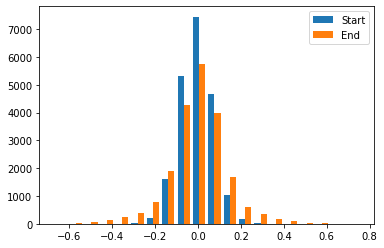

In [5]:
plt.hist([first[:, 0], second[:, 0]], bins=20, label=["Start", "End"])
plt.legend(prop={'size': 10})
plt.show()

On peut observer que le relevé fait au début de l'expérience est plus stable que celui réalisé lors de la fin car on peut voir que la majorité des relevés tendent vers 0.

## On récupère toutes les données

In [6]:
data = load_all_data()

## On affiche l'évolution des 4 capteurs au cours de l'expérience

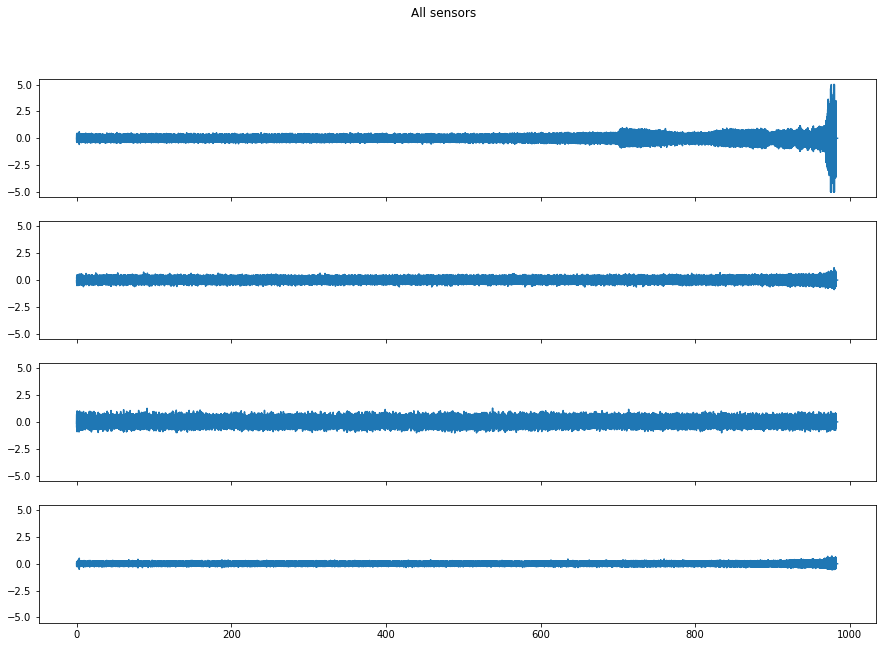

In [7]:
fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('All sensors')
for i in range(4):
    axs[i].plot(np.linspace(0, 984, len(data)), data[:, i])

On peut observer que le premier capteur commence à avoir un comportement anormal à partir du relevé 750 et s'amplifie vers le relevé 900. Quant aux autres capteurs, ceux-ci restent stable

## Implémentation de peak-to-peak

In [8]:
def my_ptp(record):
    return max(record) - min (record)

print(my_ptp(first[:, 0]))
print(np.ptp(first[:, 0]))

# assert(my_ptp(first[:, 0]) == np.ptp(first[:, 0]))
# assert(my_ptp(second[:, 0]) == np.ptp(second[:, 0]))


0.774
0.774


## Implémentation de RMS (Root Mean Square)

In [9]:
def my_rms(record):
    summ = 0
    for x in record:
        summ += x ** 2
    return np.sqrt(1/len(record) * summ)

print(my_rms(first[:, 0]))
print(np.sqrt(np.mean(first[:, 0] ** 2)))

# assert(round(my_rms(first[:, 0]), 6) == round(np.sqrt(np.mean(first[:, 0] ** 2)), 6))
# assert(round(my_rms(second[:, 0]), 6) == round(np.sqrt(np.mean(second[:, 0] ** 2)), 6))

0.07571563009461803
0.07571563009461785


## Implémentation de Kurtosis

In [10]:
def my_kurtosis(record):
    summ = 0
    sigma = np.std(record)
    for x in record:
        summ += (x / sigma) ** 4
    return 1/len(record) * summ

print(my_kurtosis(first[:, 0]))
print(scipy.stats.kurtosis(first[:, 0], fisher=False))

# assert(round(my_kurtosis(first[:, 0]), 2) == round(scipy.stats.kurtosis(first[:, 0], fisher=False), 2))
# assert(round(my_kurtosis(second[:, 0]), 2) == round(scipy.stats.kurtosis(second[:, 0], fisher=False), 2))

3.397683975507308
3.3925339025403614


## Implémentation de Crest Factor

In [11]:
def my_crest(record):
    return max(record) / my_rms(record)

print(my_crest(first[:, 0]))

4.992364185936673


## Implémentation de Skewness

In [12]:
def my_skewness(record):
    summ = 0
    sigma = np.std(record)
    for x in record:
        summ += (x / sigma) ** 3
    return 1/len(record) * summ

print(my_skewness(first[:, 0]))
print(scipy.stats.skew(first[:, 0]))
# close enough?

-0.08882900271790553
-0.012775323005232134


## Rassemblement des données statistiques

In [13]:
def statistical_indicators(record):
    return my_ptp(record), my_rms(record), my_kurtosis(record), my_crest(record), my_skewness(record)

print(statistical_indicators(first[:, 0]))

(0.774, 0.07571563009461803, 3.397683975507308, 4.992364185936673, -0.08882900271790553)


## Affichage des données

In [14]:
directory = "Test2"

ptps = [[], [], [], []]
rmss = [[], [], [], []]
kurtosiss = [[], [], [], []]
crests = [[], [], [], []]
skewnesss = [[], [], [], []]

for filename in os.listdir(directory):
    record = load_data(filename)
    for i in range(4):
        sensor_record = record[:, i]
        data = statistical_indicators(sensor_record)
        ptps[i].append(data[0])
        rmss[i].append(data[1])
        kurtosiss[i].append(data[2])
        crests[i].append(data[3])
        skewnesss[i].append(data[4])

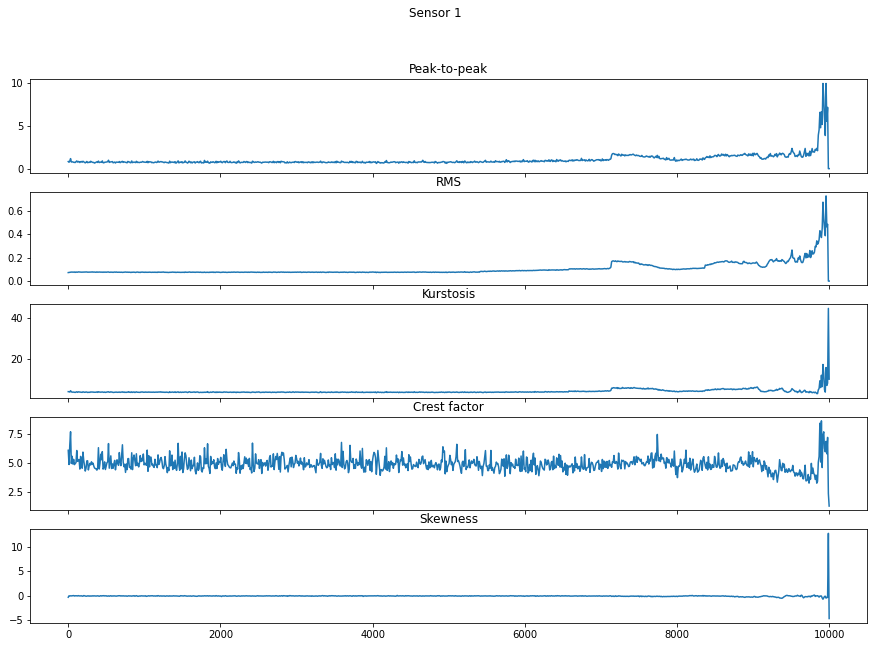

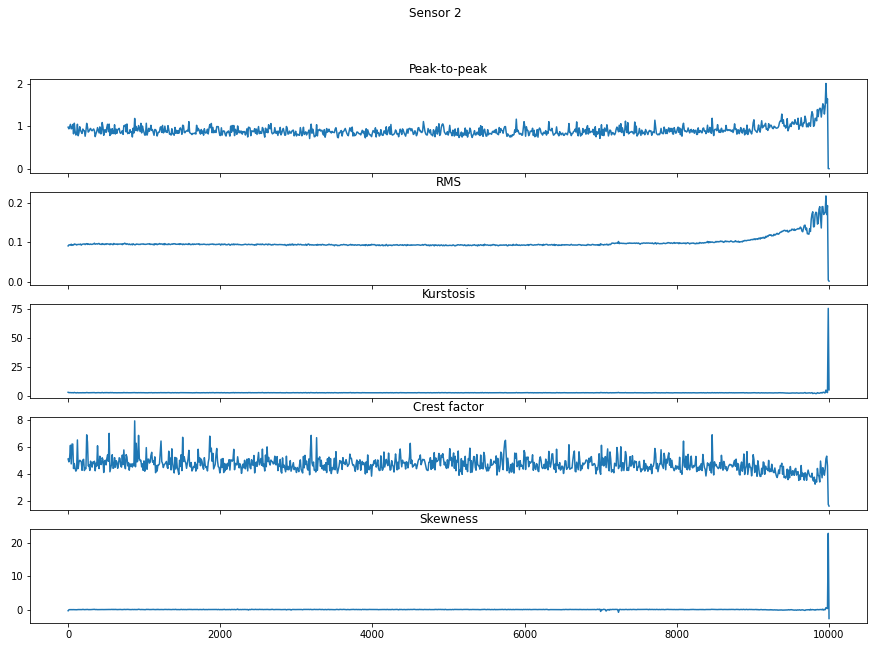

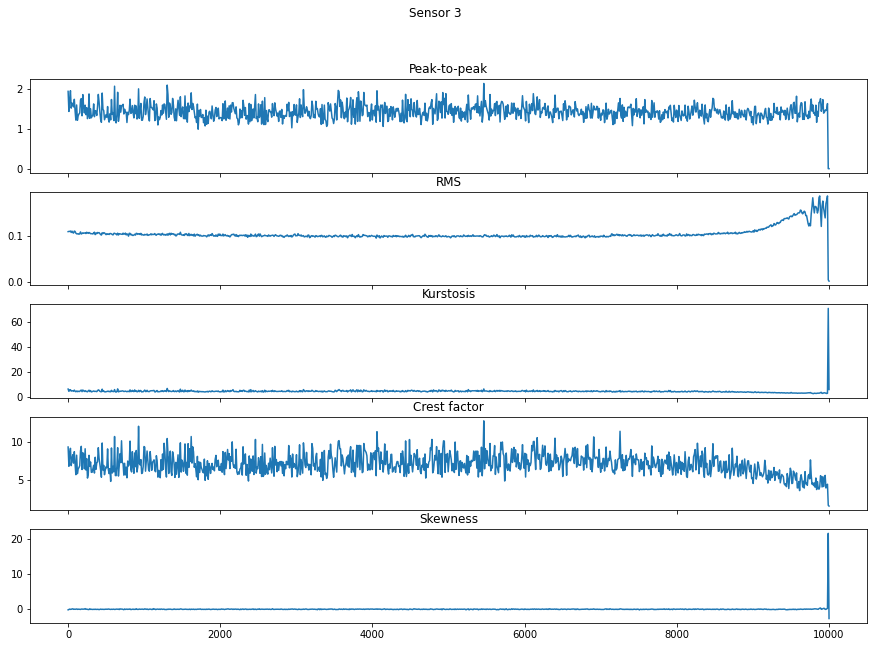

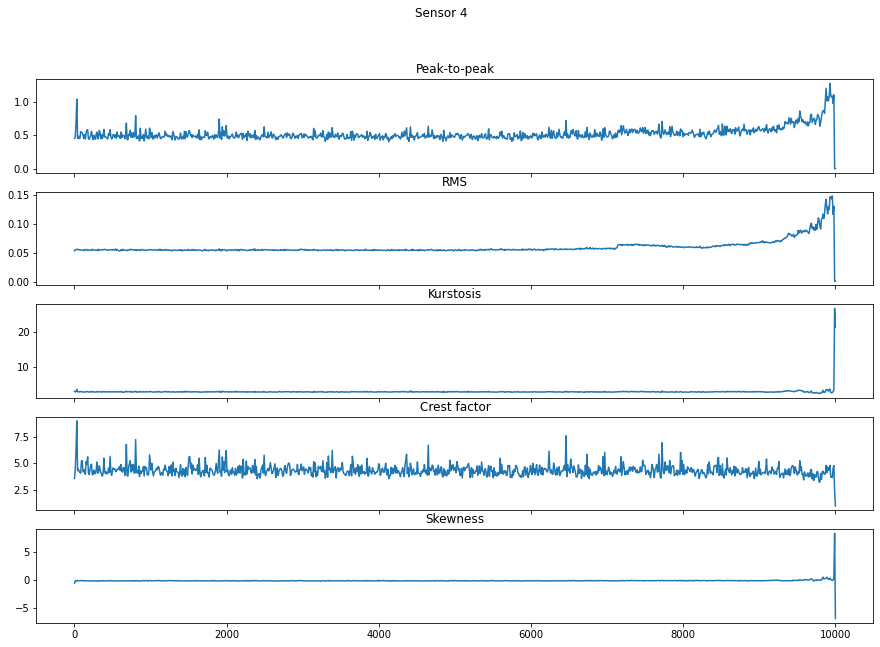

In [15]:
for i in range(4):
    fig, axs = plt.subplots(5, sharex=True, figsize=(15, 10))
    fig.suptitle(f'Sensor {i + 1}')
    axs[0].plot(np.linspace(0, 10000, len(ptps[i])), ptps[i])
    axs[0].set_title('Peak-to-peak')
    axs[1].plot(np.linspace(0, 10000, len(rmss[i])), rmss[i])
    axs[1].set_title('RMS')
    axs[2].plot(np.linspace(0, 10000, len(kurtosiss[i])), kurtosiss[i])
    axs[2].set_title('Kurstosis')
    axs[3].plot(np.linspace(0, 10000, len(crests[i])), crests[i])
    axs[3].set_title('Crest factor')
    axs[4].plot(np.linspace(0, 10000, len(skewnesss[i])), skewnesss[i])
    axs[4].set_title('Skewness')